In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("christianlillelund/csgo-round-winner-classification")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/christianlillelund/csgo-round-winner-classification/versions/3


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import os 

df = pd.read_csv(os.path.join(path, 'csgo_round_snapshots.csv'))



In [27]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler #good for outliers
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier



In [30]:
np.sum(np.sum(df.isnull()))

/Users/jeongho/Desktop/w25536-kaggle/kaggle/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0

In [31]:
df.drop(df.select_dtypes(np.number), axis=1)

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT
...,...,...,...
122405,de_train,True,T
122406,de_train,False,T
122407,de_train,False,T
122408,de_train,False,T


In [32]:
df['bomb_planted'] = df['bomb_planted'].astype(np.int16)

In [33]:
encoder = LabelEncoder()

col_list = [
    'map', 
    'round_winner',
]

map_mappings = []

for i, col in enumerate(col_list):
    df[col] = encoder.fit_transform(df[col])
    map_mappings.append({index: label for index, label in enumerate(encoder.classes_)})
    
    
for map_mapping in map_mappings:
    print(map_mapping)



{0: 'de_cache', 1: 'de_dust2', 2: 'de_inferno', 3: 'de_mirage', 4: 'de_nuke', 5: 'de_overpass', 6: 'de_train', 7: 'de_vertigo'}
{0: 'CT', 1: 'T'}


In [36]:
X = df.drop(['round_winner'], axis = 1)
y = df['round_winner']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


In [39]:
scaler = RobustScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,0.715105,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,-1.291096,-1.136054,-0.112782,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
1,0.545726,-0.857143,-0.857143,-0.666667,0.0,0.000000,0.000000,0.078767,-0.115646,-0.368421,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
2,0.010000,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
3,-0.168575,-0.857143,-0.857143,-0.666667,0.0,-0.726667,-0.561798,-0.284247,-0.455782,-0.357143,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
4,0.714837,-0.714286,-0.857143,-0.666667,0.0,0.000000,0.000000,-0.633562,-1.136054,0.966165,...,-0.333333,-0.333333,-0.333333,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-0.709837,0.714286,1.142857,1.000000,1.0,-2.000000,-1.449438,-0.623288,0.085034,-0.406015,...,0.000000,0.333333,0.000000,0.000000,0.0,0.0,0.0,-0.5,0.0,0.0
122406,0.714480,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,-0.965753,-0.540816,0.451128,...,0.000000,0.333333,0.000000,-0.333333,0.0,0.0,0.0,-0.5,0.0,0.0
122407,0.178754,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,1.000000,1.000000,0.666667,1.333333,0.5,0.0,0.0,2.0,0.0,0.0
122408,0.000179,0.714286,1.285714,1.000000,0.0,0.000000,0.000000,0.404110,0.479592,-0.323308,...,0.000000,1.333333,-0.333333,0.666667,0.0,0.0,0.0,1.5,0.0,0.0


<Axes: >

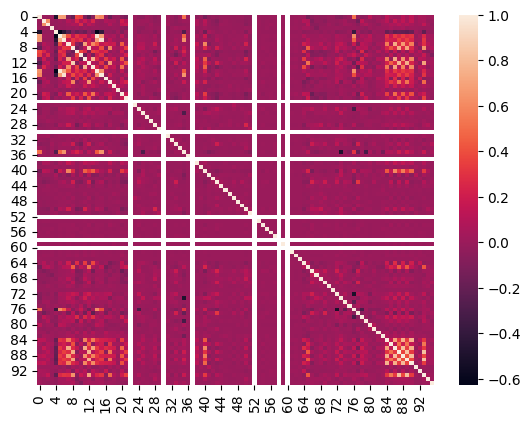

In [41]:
sns.heatmap(pd.DataFrame(X).corr())

In [42]:
pca = PCA(n_components=84)
pca.fit(X)

PCA(n_components=84)

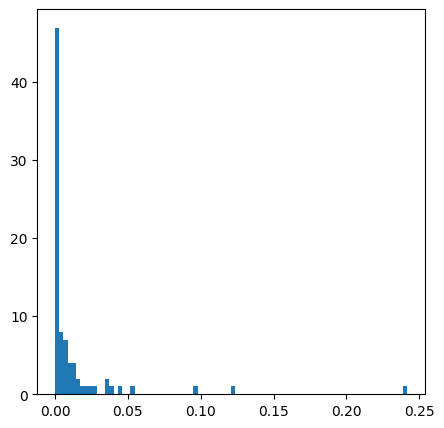

In [46]:
plt.figure(figsize=(5,5))
plt.hist(pca.explained_variance_ratio_, bins= 84)
plt.show()

In [47]:
def getKComponets(pca, alpha):
    total_variance = 0
    for feature, variance in enumerate(pca.explained_variance_ratio_):
        total_variance += variance
        if (total_variance >= 1 - alpha):
            return feature +1
    return len(pca.explained_variance_ratio)

In [54]:
K =getKComponets(pca, 0.05) # 0.1 90% satisfying the original components 


In [55]:
X = pca.transform(X)[:, 0:K]
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.807650,-3.041170,-0.477923,-0.788150,-0.837791,0.305314,-0.571604,-0.640431,0.391012,-0.089662,...,-0.406736,-0.220961,0.062492,-0.033852,-0.065296,0.007777,-0.080869,-0.049944,-0.165961,0.056775
1,-0.403354,-2.516566,-0.271932,-1.210600,-0.940974,0.463845,-0.769151,-0.302018,-0.226065,-0.320548,...,-0.424848,0.001105,0.020463,0.051323,0.030929,-0.023390,0.045672,-0.006290,0.185634,0.072155
2,-1.793312,-1.452247,-0.282613,-1.090443,-0.785376,0.333237,-0.704440,-0.376257,0.147196,-0.330615,...,0.156083,0.008170,-0.026589,0.010115,0.146338,-0.054307,0.084381,-0.020325,0.149910,0.107855
3,-1.953921,-1.452769,-0.437852,-1.067899,-0.855280,0.367944,-0.569773,-0.317184,0.120949,-0.332918,...,0.102953,0.022223,0.006126,0.070663,0.069446,-0.048108,0.049091,-0.094075,0.219295,-0.199274
4,-0.531003,-3.044842,-0.766788,-0.128865,-0.392524,0.306517,-0.459914,-0.600220,0.627068,-0.421338,...,-0.332748,-0.130514,-0.103789,0.085502,-0.007072,-0.034536,0.101459,-0.186271,0.057514,-0.024417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,-2.662008,1.291910,1.542080,0.772222,-0.739458,-0.647647,0.687017,-0.644861,-1.184389,0.700592,...,0.002813,0.159939,0.097054,-0.472091,-0.097370,-0.511502,-0.017211,-0.110692,-0.203674,0.171138
122406,0.110277,-2.209320,0.228796,1.364919,-0.437793,-0.861938,-0.019721,0.045146,-0.401692,0.860939,...,0.229384,0.662024,0.323117,-0.426443,-0.007367,-0.088607,0.094928,0.059359,-0.130469,0.205325
122407,2.375611,0.942436,1.160162,-0.669273,1.450319,1.070238,0.582792,0.596464,-1.143166,1.541248,...,0.833349,0.424366,-0.131201,0.113948,-0.116364,-0.103917,0.191911,-0.500739,-0.255426,0.079432
122408,1.905041,0.618990,1.723658,-0.066840,0.992627,1.524162,0.628238,0.485320,-1.258091,1.679712,...,0.700360,0.455182,-0.235973,0.224711,-0.127013,-0.221656,0.129971,-0.494348,-0.006301,-0.281792


In [56]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size=0.8)

In [57]:
from pycaret.classification import *



setup(data=X_train, target=y_train, session_id=42)

ValueError: X and y don't have the same indices!